# Navigation

---
### Start a new Environment

This notebook is written for Windows10 (x64) if you are using any other OS, please follow instruction in the **Getting Started** section in this [Repo](https://github.com/udacity/deep-reinforcement-learning/tree/master/p1_navigation) and change the *file_name* variable to match the location of the Unity environment that you downloaded.

* **Mac:** "path/to/Banana.app"
* **Windows:** (x86): "path/to/Banana_Windows_x86/Banana.exe"
* **Windows:** (x86_64): "path/to/Banana_Windows_x86_64/Banana.exe"
* **Linux:** (x86): "path/to/Banana_Linux/Banana.x86"
* **Linux:** (x86_64): "path/to/Banana_Linux/Banana.x86_64"
* **Linux:** (x86, headless): "path/to/Banana_Linux_NoVis/Banana.x86"
* **Linux:** (x86_64, headless): "path/to/Banana_Linux_NoVis/Banana.x86_64"

In [1]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)
print('States have length:', state_size)


Number of actions: 4
States have length: 37


Episode 50	Average Score: 0.26	Epsilon: 0.778
Episode 100	Average Score: 0.74	Epsilon: 0.606
Episode 150	Average Score: 2.47	Epsilon: 0.471
Episode 200	Average Score: 4.64	Epsilon: 0.367
Episode 250	Average Score: 6.77	Epsilon: 0.286
Episode 300	Average Score: 8.47	Epsilon: 0.222
Episode 350	Average Score: 9.27	Epsilon: 0.173
Episode 400	Average Score: 10.13	Epsilon: 0.135
Episode 450	Average Score: 11.81	Epsilon: 0.105
Episode 498	Average Score: 13.03
Environment solved in 498 episodes!	Average Score: 13.03
Episode 500	Average Score: 12.97	Epsilon: 0.082
Episode 550	Average Score: 13.51	Epsilon: 0.063
Episode 600	Average Score: 13.94	Epsilon: 0.049
Episode 650	Average Score: 14.22	Epsilon: 0.038
Episode 700	Average Score: 14.78	Epsilon: 0.030
Episode 750	Average Score: 14.92	Epsilon: 0.023
Episode 800	Average Score: 15.09	Epsilon: 0.018
Episode 850	Average Score: 15.14	Epsilon: 0.014
Episode 900	Average Score: 15.27	Epsilon: 0.011
Episode 950	Average Score: 14.92	Epsilon: 0.010
Episod

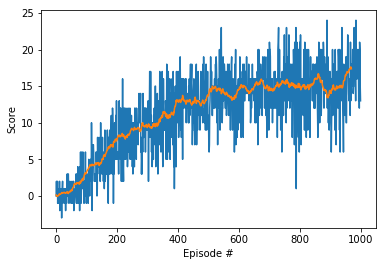

In [4]:
%reload_ext autoreload
%autoreload 2

import torch
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque

'''choose an agent to train & play with'''
from dqn_agent import Agent
#from double_dqn_agent import Agent
#from dqn_agent_perbuffer import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)


def dqn(n_episodes=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    env_unsolved = True
    
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        
        while True:
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(int(action))[brain_name]   # perform the action
            next_state = env_info.vector_observations[0]   # get next state
            reward = env_info.rewards[0]                   # get reward
            done = env_info.local_done[0]                  # check done   
            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tEpsilon: {:.3f}'.format(i_episode, np.mean(scores_window), eps))
            
        if (np.mean(scores_window)>=13.0) & env_unsolved:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            env_unsolved = False
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), pd.DataFrame(scores).rolling(30).mean().shift(-30))
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()